In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [2]:
np.random.seed(0)
x = np.random.randn(100)
y = abs(np.sin(x)) + np.random.randn()  # y = |sin(x)| + gaussian noise

In [3]:
np.random.seed(0)
knn_reg = KNeighborsRegressor(n_neighbors=5, p=2, weights='uniform')
knn_reg.fit(x.reshape(-1,1),y)

xtest = np.sort(np.random.randn(1000))
ypred = knn_reg.predict(xtest.reshape(-1,1))

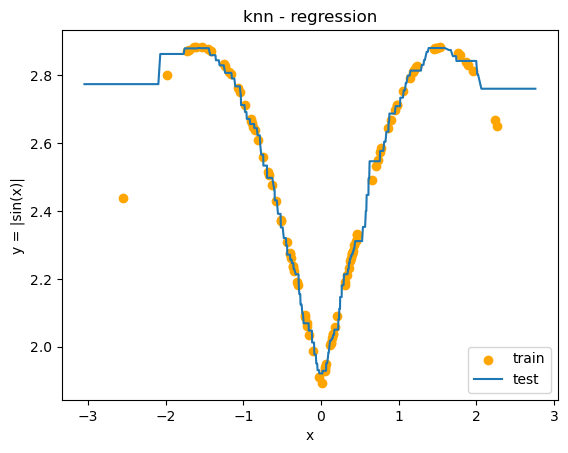

In [4]:
plt.scatter(x,y, label='train', c='orange')
plt.plot(xtest, ypred, label='test')
plt.title('knn - regression')
plt.xlabel('x')
plt.ylabel('y = |sin(x)|')
plt.legend(loc=4)
plt.show()

# variation in k

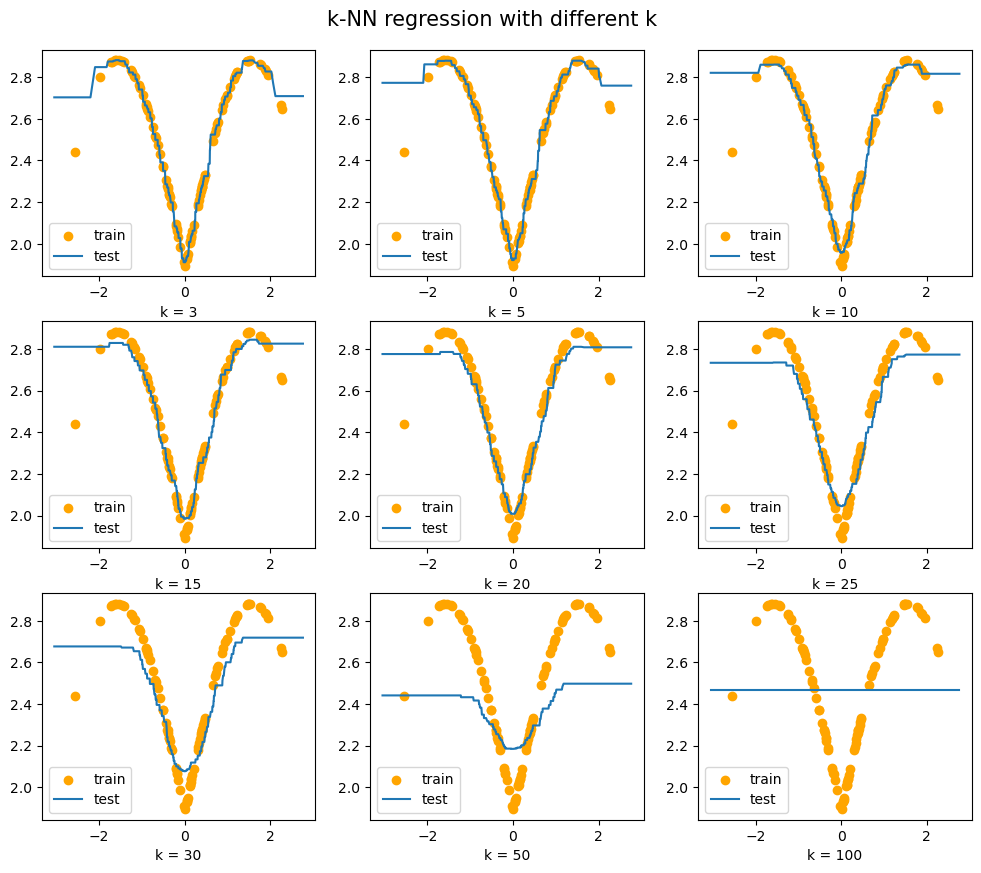

In [5]:
k = [3, 5, 10, 15, 20, 25, 30, 50, 100]

plt.figure(figsize=(12,10))

for i, ki in enumerate(k):
    knn_reg_k = KNeighborsRegressor(n_neighbors=ki, p=2, weights='uniform')
    knn_reg_k.fit(x.reshape(-1,1),y)
    
    ypred_k = knn_reg_k.predict(xtest.reshape(-1,1))
    
    plt.subplot(3,3,i+1)
    plt.scatter(x,y,label='train', c='orange')
    plt.plot(xtest,ypred_k, label='test')
    plt.xlabel('k = {0}'.format(ki))
    plt.legend(loc=3)
    
plt.suptitle('k-NN regression with different k',fontsize=15,y=0.92)
plt.show()

# variation with weights

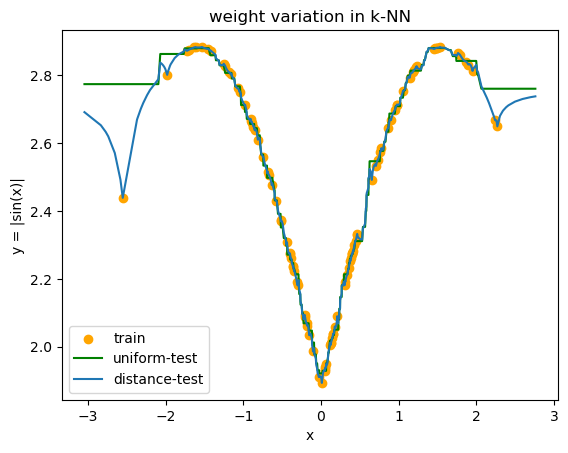

In [6]:
weights = ['uniform', 'distance']

knn_reg_uniform = KNeighborsRegressor(n_neighbors=5, p=2, weights='uniform')
knn_reg_uniform.fit(x.reshape(-1,1),y)
ypred_uniform = knn_reg_uniform.predict(xtest.reshape(-1,1))

knn_reg_distance = KNeighborsRegressor(n_neighbors=5, p=2, weights='distance')
knn_reg_distance.fit(x.reshape(-1,1),y)
ypred_distance = knn_reg_distance.predict(xtest.reshape(-1,1))

plt.scatter(x,y,label='train', c='orange')
plt.plot(xtest,ypred_uniform,label='uniform-test', color='green')
plt.plot(xtest,ypred_distance,label='distance-test')
plt.xlabel('x')
plt.ylabel('y = |sin(x)|')
plt.title('weight variation in k-NN')
plt.legend()
plt.show()